In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('../datasets/cleaned-datasets/Trips_Full_Data-cleaned.csv')

pd.set_option('display.max_columns', None)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Month of Date               7 non-null      object
 1   Week of Date                7 non-null      object
 2   Year of Date                7 non-null      int64 
 3   Level                       7 non-null      object
 4   Date                        7 non-null      object
 5   Week Ending Date            7 non-null      object
 6   Trips <1 Mile               7 non-null      int64 
 7   People Not Staying at Home  7 non-null      int64 
 8   Population Staying at Home  7 non-null      int64 
 9   Trips                       7 non-null      int64 
 10  Trips 1-25 Miles            7 non-null      int64 
 11  Trips 1-3 Miles             7 non-null      int64 
 12  Trips 10-25 Miles           7 non-null      int64 
 13  Trips 100-250 Miles         7 non-null      int64 
 14

In [11]:
df

,Month of Date,Week of Date,Year of Date,Level,Date,Week Ending Date,Trips <1 Mile,People Not Staying at Home,Population Staying at Home,Trips,Trips 1-25 Miles,Trips 1-3 Miles,Trips 10-25 Miles,Trips 100-250 Miles,Trips 100+ Miles,Trips 25-100 Miles,Trips 25-50 Miles,Trips 250-500 Miles,Trips 3-5 Miles,Trips 5-10 Miles,Trips 50-100 Miles,Trips 500+ Miles
0,August,Week 32,2019,National,2019-08-04,10-Aug-19,292959749,258404133,67763287,1322685497,934957837,346577279,200922270,8595827,15338786,79429125,59517188,2273613,171336406,216121882,19911937,4469346
1,August,Week 32,2019,National,2019-08-05,10-Aug-19,317133861,262199758,63967662,1412564488,996863262,358008909,228809869,6535920,12563068,86004297,68184743,1941260,178996059,231048425,17819554,4085888
2,August,Week 32,2019,National,2019-08-06,10-Aug-19,324443205,260096133,66071287,1437762102,1014614495,366533991,235621127,5993704,11104823,87599579,70149166,1741994,179210645,233248732,17450413,3369125
3,August,Week 32,2019,National,2019-08-07,10-Aug-19,358483024,258878802,67288618,1543710309,1084498325,401474049,249988663,5379881,8528574,92200386,74381367,1272248,189163336,243872277,17819019,1876445
4,August,Week 32,2019,National,2019-08-08,10-Aug-19,300765870,262410045,63757375,1382044815,984193010,347857770,226055368,6259735,12892348,84193587,66724543,1957888,179346163,230933709,17469044,4674725
5,August,Week 32,2019,National,2019-08-09,10-Aug-19,341515854,272101417,54066003,1501571863,1052793819,378936486,245571995,7635743,12256537,95005653,74512584,1823661,186257669,242027669,20493069,2797133
6,August,Week 32,2019,National,2019-08-10,10-Aug-19,346532975,267638064,58529356,1491503216,1040967509,386948113,230580285,7550100,12173176,91829556,70644329,1794030,186580557,236858554,21185227,2829046


# Finding the average travel distance, for those traveling, per week

In [12]:
df_travelers = df[df["People Not Staying at Home"] > 0]

# Select only trip distance columns
trip_columns = ["Trips <1 Mile", "Trips 1-3 Miles", "Trips 3-5 Miles", "Trips 5-10 Miles",
                "Trips 10-25 Miles", "Trips 25-50 Miles", "Trips 50-100 Miles",
                "Trips 100-250 Miles", "Trips 250-500 Miles", "Trips 500+ Miles"]

# Map 7 midpoints to the correct trip categories
distance_midpoints = {
    "Trips <1 Mile": 1, "Trips 3-5 Miles": 4, "Trips 5-10 Miles": 10,
    "Trips 10-25 Miles": 25, "Trips 25-50 Miles": 50, "Trips 50-100 Miles": 100,
    "Trips 100+ Miles": 300
}

# Add this as a new column to the DataFrame
df_travelers["trip_midpoint"] = distance_midpoints

for col in trip_columns:
    df_travelers[col] = pd.to_numeric(df_travelers[col], errors="coerce")

df_travelers["total_distance"] = df_travelers.apply(
    lambda row: sum(row[col] * distance_midpoints[col] for col in distance_midpoints.keys()), axis=1
)



In [13]:
weekly_avg_distance = df_travelers.groupby("Week of Date")["total_distance"].mean().reset_index()

weekly_avg_distance

,Week of Date,total_distance
0,Week 32,1.814614e+10


# Finding the weekly average amount of those staying at home

In [14]:
weekly_avg_stay_home = df.groupby("Week of Date")["Population Staying at Home"].mean().reset_index()

weekly_avg_stay_home

,Week of Date,Population Staying at Home
0,Week 32,6.306337e+07


# Identify high frequency travel days

In [15]:
df['Total Travel Distance'] = df_travelers['total_distance']

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Month of Date               7 non-null      object
 1   Week of Date                7 non-null      object
 2   Year of Date                7 non-null      int64 
 3   Level                       7 non-null      object
 4   Date                        7 non-null      object
 5   Week Ending Date            7 non-null      object
 6   Trips <1 Mile               7 non-null      int64 
 7   People Not Staying at Home  7 non-null      int64 
 8   Population Staying at Home  7 non-null      int64 
 9   Trips                       7 non-null      int64 
 10  Trips 1-25 Miles            7 non-null      int64 
 11  Trips 1-3 Miles             7 non-null      int64 
 12  Trips 10-25 Miles           7 non-null      int64 
 13  Trips 100-250 Miles         7 non-null      int64 
 14

In [17]:
shortTrips = df.loc[df['Trips 10-25 Miles'] > 10000000]

longTrips = df.loc[df['Trips 50-100 Miles'] > 10000000]

## Line chart for trips over time (Data visualisation)

<Axes: xlabel='Date', ylabel='Trips'>

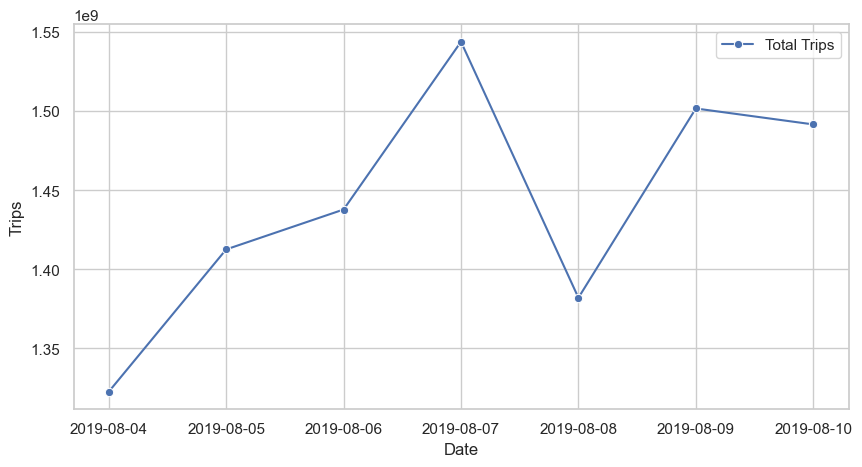

In [18]:
# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create line plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="Date", y="Trips", label="Total Trips", marker="o")



## Historgrams for weekly averages (Data visualisation)

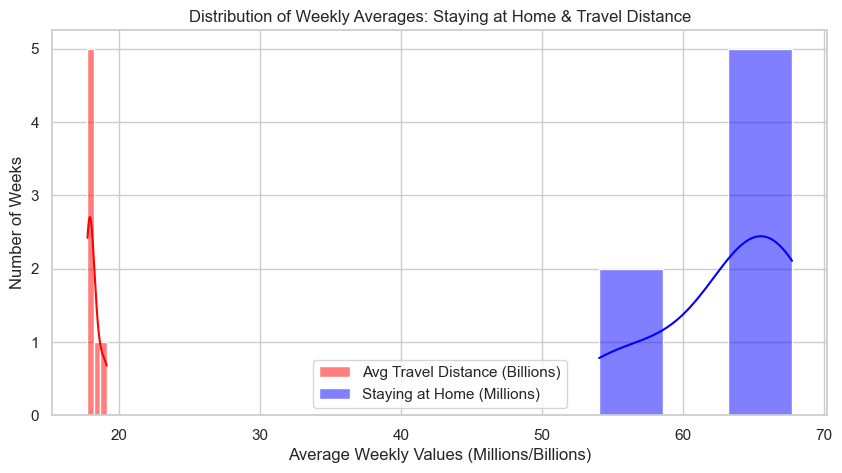

In [ ]:
# Group by week and compute averages
weekly_avg = df.groupby("Date").agg({
    "Population Staying at Home": "mean",
    "Total Travel Distance": "mean"
}).reset_index()

# Scale the values to be in millions or billions (adjust as needed)
weekly_avg["Population Staying at Home"] = weekly_avg["Population Staying at Home"] / 1e6  # Convert to millions
weekly_avg["Total Travel Distance"] = weekly_avg["Total Travel Distance"] / 1e9  # Convert to billions

plt.figure(figsize=(10, 5))

# Histogram for average travel distance (now in billions)
sns.histplot(weekly_avg["Total Travel Distance"], bins=3, color="red", label="Avg Travel Distance (Billions)", kde=True)

# Histogram for people staying at home (now in millions)
sns.histplot(weekly_avg["Population Staying at Home"], bins=3, color="blue", label="Staying at Home (Millions)", kde=True)

# Formatting
plt.xlabel("Average Weekly Values (Millions/Billions)")
plt.ylabel("Number of Weeks")
plt.title("Distribution of Weekly Averages: Staying at Home & Travel Distance")
plt.legend()
plt.show()


## Scatter plot for identifying high frequency travel days

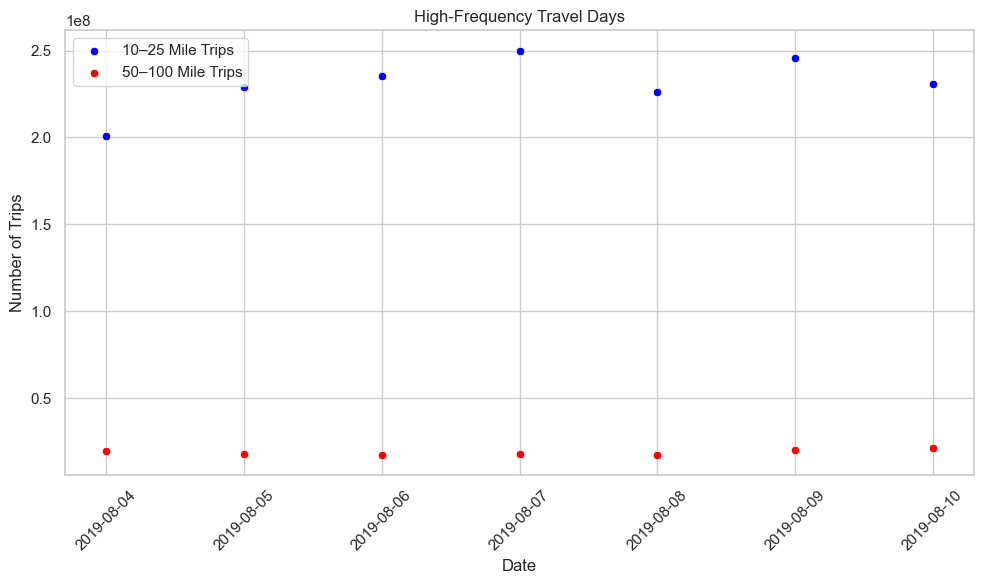

In [35]:
plt.figure(figsize=(10, 6))

# Plot for 10–25 Mile trips
sns.scatterplot(
    data=shortTrips,
    x="Date",
    y="Trips 10-25 Miles",
    color="blue",
    label="10–25 Mile Trips"
)

# Plot for 50–100 Mile trips
sns.scatterplot(
    data=longTrips,
    x="Date",
    y="Trips 50-100 Miles",
    color="red",
    label="50–100 Mile Trips"
)

plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.title("High-Frequency Travel Days")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()